## A very short introduction to convex optimization

Here I cover a basic introduction to concepts and theory of convex optimization. The goal is to give an impression of why this is an important area of optimization, what its applications are, and some intiution for how it works. This is of course not meant to overview all areas of convex optimization, it's a huge topic, but more to give a flavor of the area by describing some results and theory, particularly as they relate to other areas that may be familiar to people (e.g. Lagrange multipliers). By presenting this in a notebook the aim is to focus on providing some geometric intuition whenever possible through plotting simple examples whose parameters you can play with. Images not generated in this notebook are taken from one of the standard references: [Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf), by Boyd and Vandenberghe. 

Here I will cover:

### Contents

**Part A.**
1. Basics of convex functions and sets
2. Why care about convexity?
3. A convergence proof of gradient descent

**Part B.**
1. Conjugate functions
2. Lagrangian duality
3. Generalizing Lagrange multipliers: the KKT conditions

## Part A

Most machine learning problems end up as some form of optimization problem, thus a basic understanding of optimization methods is very useful, or sometimes necessary, to solve a given problem. 

For instance, in simple linear regression, given some data $(y, X)$ and a model $y \sim X\beta + \epsilon$, we aim to find the weights $\beta$ that minimize:
$$
\beta^* = \text{argmin}_\beta \|y - X\beta\|^2_2.
$$

In general, we consider the following basic problem:
$$
x^* = \text{argmin}_{x\in\mathcal{X}} f(x)
$$
subject to constraints:
$$
g_i(x) \le 0\\
h_j(x) = 0.
$$
Convex optimization deals with problems in which $f(x)$ and $g_i(x)$ are convex functions, and $h_j(x)$ are affine (of the form $a_j^Tx = b_j$).

### 1. Why care about convex optimization?

1. When your problem is convex, a locally optimal solution is globally optimal -> Can use gradient-based methods confidently
2. Shows up in common optimization problems
  * Linear least squares
  * Logistic regression
  * Weighted least squares
  * Any of these with L1 or L2 regularization
3. There is a lot of associated theory. Convexity is quite a strict requirement, this provides a lot of structure, which mean we can develop strong theory and geometric intuitions which can provide a good understanding of a problem
4. Can be relevant even for non-convex problems:
  * Can turn into a convex problem (primal -> dual problem, see below)
  * Can approximate with a convex function to initialize a local optimization method
  * Common heuristics: convex relaxation for finding sparse solutions, e.g. $L_0$ to $L_1$ relaxation
  * Bounds for global optimization
5. Concepts that naturally arise in convex optimization are important elsewhere, like the theory of Lagrangians

Somewhat like linear algebra, because you can do a lot with convex optimization, it is quite foundational to optimization and important to know. 

Ok, but what is a convex function?

### 2. Basics of convex functions and sets

A convex *set* is a set $C$ in which the line segment connecting any two points in the set is also in the set. That is, if $x_1,x_2\in C$ and $0\le \theta \le t$ then
$$
\theta x_1 + (1-\theta)x_2 \in C.
$$
Some examples (the middle one is *not* convex):
![title](assets/convexset.png)

A *function* $f:\mathbb{R}^n\to\mathbb{R}$ is convex if $\text{dom} f$ is convex and for $0\le \theta \le 1, x_1, x_2 \in \text{dom} f$:
$$
f(\theta x_1 + (1-\theta)x_2) \le \theta f(x_1) + (1-\theta) f(x_2)
$$

This means that a line segement connecting any two points in the domain of $f$ lies above the graph of $f$:
![](./assets/convexfunc.png)

### An alternative definition

If $f$ is differentiable, then $f$ is convex if and only if $\text{dom} f$ is convex and 
$$
f(x_2) \ge f(x_1) + \nabla f(x)^T(x_2-x_1)
$$
holds for all $x_1,x_2\in\text{dom} f$.

![](./assets/convexfunc2.png)

This means local information of a convex function can tell us about global information of the function -- this is a key property of convex functions. 

For instance, if $\nabla f(x) = 0$ then for all $y\in\text{dom} f$ it is the case that $f(y) \ge f(x)$. In other words, $x$ is a global minimizer of $f$.

A few more definitions:

**Strict convexity**

A function $f$ is *strictly convex* if the inequality holds whenever $x_1\ne x_2$. I.e. a linear function is not strictly convex

**Strong convexity**

*Strong convexity* implies there is some positive $m$ such that:
$$
\nabla^2 f(x) \succeq mI
$$
which can be shown to be equivalent to
$$
f(x) \ge f(x_1) + \nabla f(x_1)^T(x-x_1) + \frac{m}{2}\|x - x_1\|^2_2
$$
for all $x_1,x\in \mathcal{X}$. 

This means the function can be lower bounded by a quadratic function with some fixed second derivative $mI$.

In [265]:
!pip install ipympl

In [232]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

from IPython.display import display, clear_output

### Some examples of convex functions

In [27]:
def plot_heatmap(f, dom_x, dom_y, resolution = 100, title = None):
    x = np.linspace(*dom_x, resolution)
    y = np.linspace(*dom_y, resolution)
    xx, yy = np.meshgrid(x, y)
    im = f(xx,yy)
    plt.imshow(im, origin = 'lower')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    if title: plt.title(title)

1. Indicator function of a convex set, $S$. 

If $I_S(x)$ is defined as
$$
I_S(x) = \begin{cases}
0, \quad x\in S;\\
+\infty, \quad\text{else}
\end{cases}
$$
Then $I_S(x)$ is convex

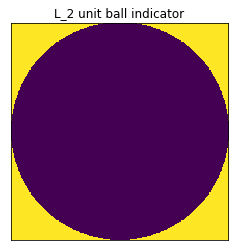

In [28]:
%matplotlib inline
f = lambda x,y: 1 - ((x**2 + y**2) < 1)
plot_heatmap(f, [-1,1], [-1,1], resolution = 500, title = "L_2 unit ball indicator")

2. Norms. Any norm is a convex function:

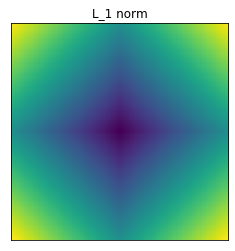

In [49]:
l1 = lambda x,y: abs(x) + abs(y)
plot_heatmap(l1, [-1,1], [-1,1], title = "L_1 norm")

3. Quadratic functions: $f(x) = x^T P x + 2q^T x + r$ for $P$ positive definite.

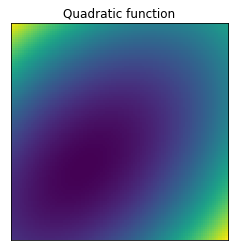

In [50]:
f = lambda x,y: x**2 - x*y + y**2 + x + y
plot_heatmap(f, [-3,3], [-3,3], title = "Quadratic function")

4. Common functions: $1/x$ for $x>0$, $e^x$ for $x\in\mathbb{R}$, $x^2$ for $x\in\mathbb{R}$.

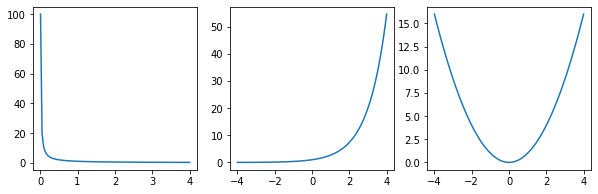

In [61]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))
xx = np.linspace(0.01, 4, 100)
axes[0].plot(xx, 1/xx);
xx = np.linspace(-4, 4, 100)
axes[1].plot(xx, np.exp(xx));
axes[2].plot(xx, xx**2);

### Examples of strong convexity

In [26]:
def make_widget_mx1(f, f_prime):
    %matplotlib widget

    fig, ax = plt.subplots(figsize = (3,3));
    xx = np.linspace(-4, 4, 100)
    ax.plot(xx, f(xx))

    x1 = 0
    m = 1
    yy = f(x1) + f_prime(x1)*(xx-x1) + m/2*(xx - x1)**2
    line, = ax.plot(xx, yy)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(['f(x)', 'lower bound'])

    def myplot(x1, m):
        yy = f(x1) + f_prime(x1)*(xx-x1) + m/2*(xx - x1)**2
        line.set_ydata(yy)
        ax.relim()
        display(fig)
        clear_output(wait=True)

    widgets.interact(myplot, x1=(-4,4,.1), m = (0, 2,0.2));

In [31]:
f = lambda x: x**2
f_prime = lambda x: 2*x
make_widget_mx1(f, f_prime)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='x1', max=4.0, min=-4.0), FloatSlider(value=1.0, desc…

$f(x) = x^2$, somewhat trivally, *is* a strongly convex function.

In [32]:
f = lambda x: np.exp(x)
f_prime = f
make_widget_mx1(f, f_prime)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='x1', max=4.0, min=-4.0), FloatSlider(value=1.0, desc…

$f(x) = \exp(x)$ is *not* a strongly convex function. The general idea being something like functions that become arbitarily flat/linear in some direction are not strongly convex.

### Operations that preserve convexity

1. Non-negative weighted sums.

If $f_i$ are each convex, then the nonnegative weighted sum:
$$
f(x) = \sum_i w_i f_i(x)
$$
is convex, for $w_i \ge 0$.

2. Composition with nondecreasing functions.

Let $f = h(g(x))$. If $h$ is a scalar function, $h:\mathbb{R}\to\mathbb{R}$, then:

For example, if $h$ is convex and nondecreasing, and $g$ is convex, then $f$ is convex.

3. Pointwise maxima.

If $f_1$ and $f_2$ are convex, then the pointwise maximum:
$$
f(x) = \max\{f_1(x), f_2(x)\}
$$
is also convex. The proof is simple:
$$
\begin{align}
f(\theta x + (1-\theta)y) &= \max\{f_1(\theta x + (1-\theta)y), f_2(\theta x + (1-\theta)y)\}\\
&\le \max\{\theta f_1(x) + (1-\theta)f_1(y), \theta f_2(x) + (1-\theta)f_2(y)\}\quad\text{(conv. of $f_1,f_2$)}\\
&\le \theta\max\{ f_1(x), f_2(x) \} + (1-\theta)\max\{f_1(y),f_2(y)\}\quad\text{(replace $f_1$ w. max $f_1,f_2$)}\\
&= \theta f(x) + (1-\theta) f(y)
\end{align}
$$

This result extends to pointwise maximum over $n$ functions:
$$
f(x) = \max\{(f_i(x)\}_{i=1}^n
$$

and also the pointwise supremum over an infinite set of convex functions. Let $\{f_i(x)\}_{i\in I}$ be a collection of convex functions, then
$$
g(x) = \sup_{i\in I}f_i(x)
$$
is convex.

### 3. Convergence of gradient descent

For a strongly convex function that satisfies:
$$
\alpha I \preceq \nabla^2 f(x) \preceq \beta I
$$
for all $x\in\mathcal{X}$ and $0<\alpha \le \beta$. An equivalent condition is for
$$
f(y) \ge f(x) + \nabla f(x)(y-x) + \frac{\alpha}{2}\|y-x\|^2,\quad \forall x,y\in\mathcal{X}
$$
known as $\alpha$-strongly convex. And 
$$
f(y) \le f(x) + \nabla f(x)(y-x) + \frac{\beta}{2}\|y-x\|^2,\quad \forall x,y\in\mathcal{X}
$$
Known as $\beta$-smoothness.

In other words, for all points $x\in\mathcal{X}$, the function $f(y)$ can be bounded below and above by quadratic functions intersecting at $f(x)$.

This can be used to show the following inequalities:
$$
\begin{align}
\frac{\alpha}{2}\|x^* - x\|^2&\le f(x) - f(x^*) \le \frac{1}{2\alpha}\|\nabla f(x)\|^2\quad \text{$\alpha$-strongly convex}\\
\frac{\beta}{2}\|x^* - x\|^2&\ge f(x) - f(x^*) \ge \frac{1}{2\beta}\|\nabla f(x)\|^2\quad\text{$\beta$-smoothness}\\
\end{align}
$$

Call the quantity $h(x) = f(x)-f(x^*)$ the *primal gap*, the thing we are trying to reduce in our optimization. 

These inequalities are useful because they let us bound the primal gap by the gradient and the amount we're moving in $x$ (a property of the algorithm, which is known).


Now consider the gradient descent update:
$$
x_{t+1} = x_t - \frac{1}{\beta}\nabla f(x_t)
$$

Then the above inequalities can be used to show how the primal gap converges:
$$
\begin{align}
h_{t+1} - h_t &= f(x_{t+1}) - f(x_t)\\
&\le \nabla f(x_t)(x_{t+1}-x_t) + \frac{\beta}{2}\|x_{t+1}-x_t\|^2\quad (\text{$\beta$-smoothness})\\
&= -\frac{1}{\beta}\|\nabla f(x_t)\|^2 + \frac{1}{2\beta}\|\nabla f(x_t)\|^2\quad (\text{definition of algorithm})\\
&= -\frac{1}{2\beta}\|\nabla f(x_t)\|^2\quad\\
&\le -\frac{\alpha}{\beta}h_t\quad\\
\end{align}
$$
Thus 
$$
h_{t+1} = h_t(1 - \frac{\alpha}{\beta}), 
$$
or
$$
h_{t} = h_0(1 - \frac{\alpha}{\beta})^t.
$$
Since $\alpha < \beta$ then the algorithm converges. Further, how close $\alpha$ is to $\beta$ determines the convergence rate -- convergence is fastest when $\alpha$ is close to $\beta$... this corresponds to the Hessian being closed to spherical (well-conditioned).

In [266]:
def make_widget_gd():
    %matplotlib widget

    fig, axes = plt.subplots(1, 2, figsize = (10,5));
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    xx, yy = np.meshgrid(x, y)

    ax = axes[0]
    alpha = 1
    beta = 5
    f = lambda x, y: (alpha * x**2 + beta * y**2)/2
    zz = f(xx, yy)
    ax.imshow(zz, extent = (-4, 4, -4, 4))

    #Run GD n times
    theta = np.array([3,3])
    n = 7
    theta_hist = np.zeros((n, 2))
    f_hist = np.zeros(n)
    for idx in range(n):
        theta_hist[idx,:] = theta
        f_hist[idx] = f(*theta)
        theta = theta - np.array([alpha*theta[0], beta*theta[1]])/(0.8*beta)
    #Plot the progress of the optimization    
    line, = ax.plot(*theta_hist.T, color = 'red')

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    line2, = axes[1].plot(f_hist)
    axes[1].set_yscale('log')
    axes[1].set_ylim([0.001,20])
    
    #Replot with new params
    def myplot(alpha, beta):

        f = lambda x, y: (alpha * x**2 + beta * y**2)/2
        zz = f(xx, yy)
        ax.imshow(zz, extent = (-4, 4, -4, 4))

        theta = np.array([3,3])
        theta_hist = np.zeros((n, 2))
        f_hist = np.zeros(n)
        for idx in range(n):
            theta_hist[idx,:] = theta
            f_hist[idx] = f(*theta)
            theta = theta - np.array([alpha*theta[0], beta*theta[1]])/(1.1*beta)

        line.set_xdata(theta_hist[:,0])
        line.set_ydata(theta_hist[:,1])
        line2.set_ydata(f_hist)
        #ax.relim()
        display(fig)
        clear_output(wait=True)#

    widgets.interact(myplot, alpha=(0,2,.1), beta = (0, 4,0.2));

As an example, consider the quadratic function:
$$
f(x,y) = \frac{m_x}{2}x^2 + \frac{m_y}{2}y^2.
$$
This is strongly convex, with $\alpha = \min(m_x, m_y)$ and $\beta = \max(m_x, m_y)$. We observe the convergence behavior (the primal gap as a function of gradient descent iteration). Apart from the first iteration, it's linear on a log scale, as the above analysis would suggest. The slope depends on the ratio between $\alpha$ and $\beta$.

In [127]:
make_widget_gd()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0), FloatSlider(value=2.0, description…

## Part B.

Here we explore how some theory of convex functions and optimization relates to a common and powerful method in optimization -- Lagrange multipliers

### 1. Conjugate functions


Let $f:\mathbb{R}^n\to\mathbb{R}$, then we can define $f^*:\mathbb{R}^n\to\mathbb{R}$ as
$$
f^*(\lambda) = \sup_{x\in\text{dom} f} (\lambda^T x - f(x)).
$$
As this is the pointwise supremum over a set of convex (linear) functions, it is itself convex. This is true regardless of whether $f$ is convex. This is known as the conjugate of $f$.

How can this be convex even if $f$ is not? Here's one example:

Consider the non-convex function $f(x) = x^2(x-1)(x+1)$

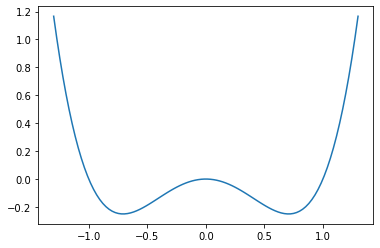

In [101]:
%matplotlib inline
f = lambda x: x**2*(x-1)*(x+1)

xx = np.linspace(-1.3,1.3,100)
yy = f(xx)
plt.plot(xx,yy);

Its conjugate is obtained through computing the following maximum:

In [124]:
def make_widget_conjugate(res = 100):
    %matplotlib widget
    
    fig, axes = plt.subplots(1, 2, figsize = (10,5));
    xx = np.linspace(-1.3, 1.3, res)

    y = 1
    f = lambda x: x**2*(x-1)*(x+1)

    fstar = lambda x, y: x*y - f(x)
    yy = fstar(xx, y)
    l1, = axes[0].plot(xx,yy)
    
    idx_star = np.argmax(yy)
    x_star = xx[idx_star]
    y_star = np.max(yy)
    
    l2, = axes[0].plot(x_star, y_star, '.', color = 'red')

    axes[0].set_xlabel('x')
    axes[0].set_title('yx - f(x)')
    
    y_range = np.linspace(-2, 2, res)
    fstar_all = np.zeros(res)
    for idx, ys in enumerate(y_range):
        fstar_all[idx] = np.max(fstar(xx, ys))
        
    axes[1].plot(y_range, fstar_all)
    l3, = axes[1].plot(y, y_star, '.', color = 'red')
    
    axes[1].set_xlabel('y')
    axes[1].set_title('f^*(y)')

    #Replot with new params
    def myplot(y):

        yy = fstar(xx, y)
        l1.set_ydata(yy)

        idx_star = np.argmax(yy)
        x_star = xx[idx_star]
        y_star = np.max(yy)

        l2.set_ydata(y_star)
        l2.set_xdata(x_star)
        l3.set_ydata(y_star)
        l3.set_xdata(y)

        #ax.relim()
        display(fig)
        clear_output(wait=True)#

    widgets.interact(myplot, y = (-2, 2, 0.1));

In [125]:
make_widget_conjugate()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='y', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

Which is clearly convex.

### Some more examples

1. Affine functions. If $f(x) = ax+b$ then $f^*:\{a\}\to\mathbb{R}$ and $f^*(a) = -b$
2. Exponential. If $f(x) = \exp(x)$ then $f^*:\mathbb{R}_+\to\mathbb{R}$ and $f^*(x) = x\log x - x$
3. Negative entropy. If $f(x) = x\log x$ then $f^*(x) = \exp(x-1)$.
4. Strictly convex quadratic function. If $f(x) = \frac{1}{2}x^TQx$ with $Q$ positive definite, then $f^*(x) = \frac{1}{2}x^TQ^{-1}x$

If $f(x)$ is convex, then (given some additional technical condtions), $f(x) = f^{**}(x)$, justifying the use of the term conjugate.

### 2. Lagrangian duality

The conjugate relates to an important concept in convex optimization, known as Lagrangian duality. 

This can be thought of as a generalization of a common method in optimization, that of Lagrange multipliers, which I'll review first. 

### 2.1 Lagrange multipliers

Let's consider the optimization problem
$$
\min f(x)\\
h_i(x) = 0
$$
Unlike above, here we don't (yet) assume $f(x)$ is convex.

Lagrange multipliers are a method for solving this constrained minimization problem by converting it into an unconstrained problem. This can be generalized (see below), but the basic method I'll present in this section only deals with equality constraints. 

The idea is to *augment* the objective function with a weighted sum of the constraint functions, forming what is known as the Lagrangian:
$$
\mathcal{L}(x, \nu) = f(x) + \sum_{i=1}^p \nu_i h_i(x)
$$
The variables $\nu_i$ are known as the Lagrange multipliers.

The basic idea is that by looking for stationary points of the *unconstrained* Lagrangian
$$
\nabla \mathcal{L}(x,\nu) = 0
$$
we can obtain solutions to the original problem. Why does this work? First note that solving $\frac{\partial \mathcal{L}}{\partial x} = 0$ and $\frac{\partial \mathcal{L}}{\partial \nu}=0$ gives:
$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial x} = 0 &\Rightarrow \nabla_x f(x) + \sum_{i=1}^p \nu_i \nabla_x h_i(x) = 0\\
\frac{\partial \mathcal{L}}{\partial \nu} = 0 &\Rightarrow h_i(x) = 0, \forall i
\end{align*}
$$
Thus finding stationary points of $\mathcal{L}$ will correspond to points satisfying the constraints.

But why should it minimize the function given the constraint? The graphical intuition is the following:


<img src="./assets/LagrangeMultipliers2D.svg" alt="drawing" width="600"/>

### 2.2 The dual problem

#### The dual function

Let's begin the process of generalizing this approach to deal with inequality constraints, too. That is, let's turn to the problem
$$
\min f(x)\\
g_i(x) \le 0,\quad i = 1, \dots, m \\
h_j(x) = 0,\quad i = 1, \dots, p 
$$

Define the Lagrangian of the this problem as:
$$
\mathcal{L}(x, \lambda, \nu) = f(x) + \sum_{i = 1}^m\lambda_i g_i(x) + \sum_{j=1}^p\nu_i h_i(x)
$$
Again, $\lambda$ and $\nu$ are Lagrange multipliers, or *dual variables*.

From this we can define the Lagrange dual function:
$$
g(\lambda, \nu) = \inf_{x\in\mathcal{X}}\mathcal{L}(x, \lambda, nu).
$$
Now, we use the same property as above: the pointwise *infimum* (read minimum) of a family of affine functions of $(\lambda,\nu)$ is concave. This is true even when the optimization problem above is not convex.

For a common problem class there is a relation between the dual function and the conjugate that can facilitate computation of $g(\lambda, \nu)$. For problems of the form:
$$
\min f(x)\\
Ax \preceq b,\\
Cx = d
$$
then
$$
\begin{align}
g(\lambda, \nu) &= \inf_x \left(f(x) + \lambda^T (Ax-b) + \nu^T(Cx-d) \right)\\
&= -b^T\lambda - d^T\nu + \inf_x \left(f(x) + \lambda^T (A^T\lambda + C^T\nu)x \right)\\
&= -b^T\lambda - d^T\nu -f^*(-A^T\lambda - C^T\nu)
\end{align}
$$

An important property is that the dual function is a lower bound for the solution to the original problem. Call $p^*$ the minimum obtained at the optimal solution to the problem: $p^* = f(x^*)$.

The original problem is known as the primal problem. Then, we have:
$$
g(\lambda, \nu) \le p^*
$$
for any $\lambda \succeq 0$ and for any $\nu$.

This is easy to show: the optimal $x^*$ satisfies the constraints $g_i(x)\le 0$ and $h_i(x) = 0$, thus
$$
\sum_{i=1}^m\lambda_ig_i(x^*) \le 0
$$
and
$$
\sum_{i=1}^p\nu_ih_i(x^*) = 0
$$
thus 
$$
L(x^*, \lambda, \nu) = f(x^*) + \sum_{i=1}^m\lambda_ig_i(x^*) + \sum_{i=1}^p\lambda_ih_i(x^*) \le f(x^*).
$$
This means:
$$
g(\lambda, \nu) = \inf_x L(x, \lambda, \nu) \le L(x^*, \lambda, \nu) \le f(x^*) = p^*
$$

#### The dual problem

Ok, so what do we do with this lower bound? A natural thing to do is to ask, how high can we make this lower bound? This is the dual problem:
$$
\max_{\lambda \succeq 0, \nu} g(\lambda, \nu)
$$

The solution is denoted $(\lambda^*, \nu^*)$, the *dual optimal* solution. Since this is a maximization of a concave function, it is a convex problem, even if the primal problem is not. 

Call $d^* = g(\lambda^*, \nu^*)$. Then from above, we have
$$
d^*\le p^*
$$
The difference $p^* - d^*$ is known as the optimal duality gap.

This general inequality is known as *weak duality*. Even weak duality can be useful. As in some cases the dual problem may be efficiently solvable (being a convex problem) while the original one is much more challenging. Thus it can be useful to find a lower bound on the primal solution.

#### Strong duality

When the gap is zero:
$$
d^* = p^*
$$
then *strong duality* holds. Now the dual problem can say a lot more about our original problem, which we'll cover momentarily. 

#### Some examples

But this has been quite a bit of theory. So what are some examples of these concepts?

Well, let's consider again the simple quadratic function $f(x) = x^2/2$ with inequality constraints $x - a \le 0$. The Lagrangian is 
$$
L(x, \lambda) = x^2/2 + \lambda(x-a)
$$
thus the dual function is
$$
g(\lambda) = \inf_x L(x, \lambda) = -\lambda^2/2 - \lambda a
$$
We can see that by maximizing $g(\lambda)$ over $\lambda \ge 0$ we get:
$$
\lambda^* = \max(-a, 0), \quad d^* = \begin{cases}
a^2/2, \quad a < 0;\\
0, \quad a \ge 0
\end{cases}
$$
which matches the optimal solution $p^*$.


In [184]:
def make_widget_dualprob1(res = 100):
    %matplotlib widget

    a = -2
    fig, axes = plt.subplots(1, 2, figsize = (10,5))
    f = lambda x: x**2/2
    g = lambda l, a: -l**2/2 - l*a
    xx = np.linspace(-3,3,100)

    axes[0].plot(xx,f(xx));
    axes[0].set_xlabel('x')
    axes[0].set_title('primal problem: $\min f(x) = x^2/2, x <= a$')

    #These things depend on a
    l11, = axes[0].plot(a, a*a*(a<0)/2, '.', color = 'red', linewidth = 10)
    l12 = axes[0].axhline(a*a*(a<0)/2, color = 'red', linewidth = 2)
    l13 = axes[0].axvline(x = a, color = 'black');
    
    axes[0].set_ylim([-1, 4])

    xx2 = np.linspace(0,6,100)
        
    #These things depend on a
    l21, = axes[1].plot(xx2,g(xx2, a));
    l22 = axes[1].axhline(a*a*(a<0)/2, color = 'red', linewidth = 2)
    l23 = axes[1].axhline(a*a*(a<0)/2, color = 'black', linestyle = '-.', linewidth = 1)

    axes[1].set_ylim([-1, 4])
    axes[1].set_xlabel('$\lambda$')
    axes[1].set_title('dual problem: $\max g(\lambda) = -\lambda^2/2 - \lambda a, \lambda >= 0$');
    
    #Replot with new params
    def myplot(a):

        l11.set_xdata(a)
        l11.set_ydata(a*a*(a<0)/2)
        l13.set_xdata(a)

        l12.set_ydata(a*a*(a<0)/2)
        
        l21.set_ydata(g(xx2, a))
        l22.set_ydata(a*a*(a<0)/2)
        l23.set_ydata(a*a*(a<0)/2)

        #ax.relim()
        display(fig)
        clear_output(wait=True)

    widgets.interact(myplot, a = (-2, 2, 0.4));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0, step=0.4), Output()), _dom_cl…

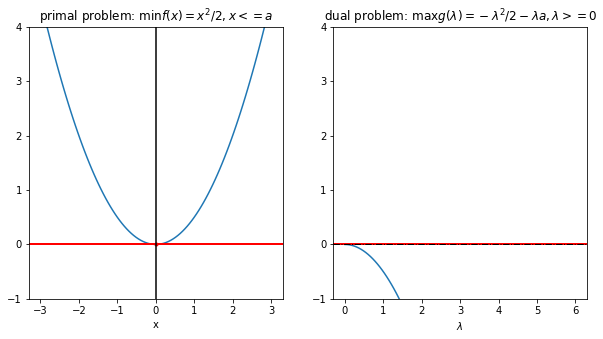

In [185]:
make_widget_dualprob1()

What if we try with a non-convex function? Now let $f(x) = -x^3+x$, again with $x\le a$. 

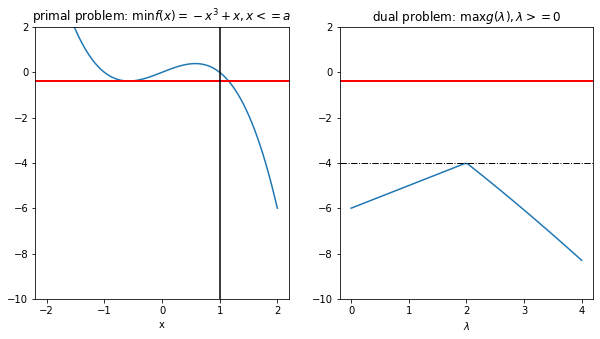

In [214]:
%matplotlib inline
a = 1
res = 100
fig, axes = plt.subplots(1, 2, figsize = (10,5))
f = lambda x: -x*(x-1)*(x+1)
xx = np.linspace(-2,2,res)

axes[0].plot(xx,f(xx));
axes[0].set_xlabel('x')
axes[0].set_title('primal problem: $\min f(x) = -x^3+x, x <= a$')

axes[0].axhline(np.min(f(xx[xx<a])), color = 'red', linewidth = 2)

axes[0].axvline(x = a, color = 'black');
axes[0].set_ylim([-10, 2])

ll = np.linspace(0,4,res)
#Now we compute g(l) numerically
gg = np.zeros(res)
for idx, l in enumerate(ll):
    LL = -xx**3 + xx + l*(xx-a)
    gg[idx] = np.min(LL)


axes[1].plot(ll,gg)
axes[1].axhline(np.min(f(xx[xx<a])), color = 'red', linewidth = 2)
axes[1].axhline(np.max(gg), color = 'black', linestyle = '-.', linewidth = 1)

axes[1].set_ylim([-10, 2])
axes[1].set_xlabel('$\lambda$')
axes[1].set_title('dual problem: $\max g(\lambda), \lambda >= 0$');

This time we do have a duality gap.

#### Min-max interpretation

As in interesting aside, the primal problem can be expressed in a way that gives a nice symmetry to the two problems. 

Consider the case where we only have inequality constraints. Then we have:
$$
\sup_{\lambda \succeq 0} L(x,\lambda) = \sup_{\lambda \succeq 0}\left(f(x) + \sum_{i=1}^m \lambda_i g_i(x)\right) = f(x)
$$
This is because, provided the constraints are satisfied, $g_i(x) \le 0$ and the best choice is $\lambda = 0$. Thus we can write:
$$
p^* = \inf_x f(x) = \inf_x \sup_{\lambda \succeq 0} L(x,\lambda)
$$
and, by our earlier definitions, we have:
$$
d^* = \sup_{\lambda\succeq 0}\inf_x L(x,\lambda).
$$

This means weak duality implies:
$$
\sup_{\lambda\succeq 0}\inf_x L(x,\lambda) \le \inf_x \sup_{\lambda\succeq 0} L(x,\lambda).
$$
This is in fact a general result that any function $f(x,\lambda)$ satisfies. This is known as the max-min inequality. 

Strong duality implies:
$$
\sup_{\lambda\succeq 0}\inf_x L(x,\lambda) = \inf_x \sup_{\lambda\succeq 0} L(x,\lambda)
$$
(This is also known as the saddle point property, because the optimal point $(x^*, \lambda^*)$ is in fact a saddle point of $L$. This result is known as the minimax theorem, proved by von Neumann in the context of his work on game theory).

We can see the saddle point property at play if we plot the Lagrangian for our earlier quadratic problem:
$$
\min x^2, \quad x \le a
$$
The Lagrangian is:
$$
L(x, \lambda) = x^2 + \lambda(x-a)
$$

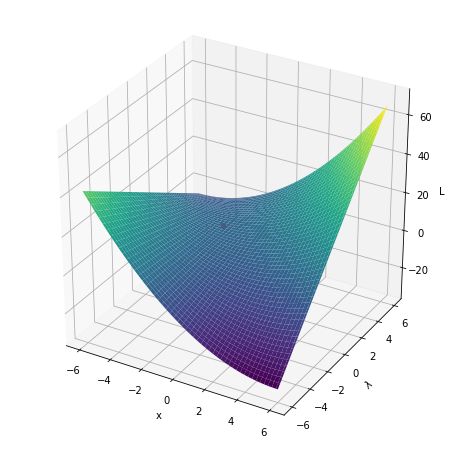

In [253]:
a = -2
x = np.linspace(-6, 6, 100)
l = np.linspace(-6, 6, 100)
xx, ll = np.meshgrid(x, l)

L = lambda x, l: x**2/2 + l*(x-a)
zz = L(xx, ll)

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(xs = -2, ys = 2, zs = 2, color = 'red')
surf = ax.plot_surface(xx, ll, zz, antialiased=True, cmap='viridis')

plt.xlabel('x')
plt.ylabel('$\lambda$');
ax.set_zlabel('L');

### 3. Generalizing Lagrange multipliers: the KKT conditions

#### Complementary slackness

When strong duality holds we have an important property of the optimal solution known as complementary slackness. 

We have
$$\begin{align}
f(x^*) &= g(\lambda^*, \nu^*)\\
&= \inf_x\left(f(x) + \sum_{i=1}^m\lambda^*_i g_i(x) + \sum_{i=1}^p\nu^*_i h_i(x)\right)\\
&\le f(x^*) + \sum_{i=1}^m\lambda^*_i g_i(x^*) + \sum_{i=1}^p\nu^*_i h_i(x^*)\\
&\le f(x^*) 
\end{align}$$

This implies that 
$$
\sum_{i=1}^m \lambda_i^* g_i(x^*) = 0
$$
and, since each term in the sum is nonpositive, then in fact each term must be zero:
$$
\lambda_i^* g_i(x^*) = 0, \quad i = 1, \dots, m.
$$

Usefully, this property gives additional equality constraints a solution must satisfy to be optimal. In particular, it means that either $\lambda_i^* = 0$ or $g_i(x^*) = 0$. In other words, when $\lambda_i^* > 0$ then the inequality constraint $g_i$ must be tight. If $\lambda_i = 0$ then it can be slack.

We actually saw complementary slackness at play in our simple quadratic example above. If we plot $g(x^*) = x^* - a, \lambda^*$ as a function of the inequality constraint parameter $a$ (recall $x \le a$):

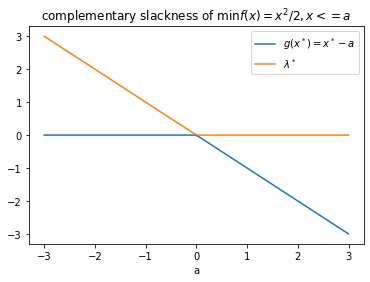

In [264]:
%matplotlib inline
aa = np.linspace(-3,3,100)

x_star_a = lambda x: np.minimum(0, x)-x
l_star = lambda l: np.maximum(0, -l)

plt.plot(aa, x_star_a(aa));
plt.plot(aa, l_star(aa));
plt.xlabel('a')
plt.title('complementary slackness of $\min f(x) = x^2/2, x <= a$');
plt.legend(['$g(x^*) = x^*-a$', '$\lambda^*$']);

We see for $a\le 0$ the constraint is tight, and $x^* = a$. For $a>0$, then the optimal solution is $x^* = 0$, and $x^* - a$ becomes slack.


#### KKT for non-convex problems


Here we assume the functions $f(x), g_i(x), h_i(x)$ are all differentiable. We can argue that $x^*$ minimizes $L(x, \lambda^*, \nu^*)$, and therefore the gradient must vanish at $x^*$:
$$
\nabla f(x^*) + \sum_{i=1}^m\lambda_i^*\nabla g_i(x^*) + \sum_{i=1}^p\nu_i^*\nabla h_i(x^*) = 0
$$

Now we're in a position to see how all this theory relates to our optimization problem, when strong duality obtains. 

Let's collect conditions an optimal solution $(x^*, \lambda^*, \nu^*)$ must satisfy, for problems with strong duality. We have:
$$
\begin{align}
g_i(x^*) &\le 0, \quad i=1, \dots, m\\
h_i(x^*) &= 0, \quad i=1, \dots, p\\
\lambda^*_i &\ge 0, \quad i=1, \dots, m\\
\lambda_i^* g_i(x^*) &= 0, \quad i=1, \dots, m\\
\nabla f(x^*) + \sum_{i=1}^m\lambda_i^*\nabla g_i(x^*) + \sum_{i=1}^p\nu_i^*\nabla h_i(x^*) &= 0
\end{align}
$$

These are known as the Karush-Kuhn-Tucker (KKT) conditions. They are *necessary* conditions for an optimal solution. 

Note that if we have no inequality constraints, the above conditions simplify to the method of Lagrange multipliers that we discussed above:
$$
\begin{align}
h_i(x^*) &= 0,\quad i =1, \dots, p\\
\nabla f(x^*) + \sum_{i=1}^p\nu_i^*\nabla h_i(x^*) &= 0
\end{align}
$$

#### KKT for convex problems

When the primal problem is convex, the KKT conditions are also *sufficient* for an optimal solution. 

To summarize all of the above: for any differentiable optimization problem for which strong duality obtains, the KKT conditions provide necessary conditions for an optimal solution. Algorithms focus on finding all points which satisfy such conditions, and from those finding the globally optimal solution. 

When the problem is convex, KKT is also sufficient, and *any* solution that satisifes the conditions is optimal. 

Outside of convexity, there are a range of other *constraint qualifications* that imply that a particular problem has strong duality, and therefore that KKT is relevant. 

#### An example: L1 regularization

Ok, finally...

How does all this apply to a common problem, the lasso?

## Take-home messages

After going through this tutorial, you should now know:
* What convexity is and why its important for optimization
* How some properties of convex functions are used to prove convergence of gradient descent
* What primal and dual optimization problems are
* How the KKT conditions generalize Lagrange multipliers for inequality constraint problems
